In [1]:
import pandas as pd
import numpy as np

# Read in Data
df = pd.read_csv('Reddit_Comments_7M_2019.csv')

C:\Users\Adrien\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Round 1

I was able to pull 681000 comments from the following subreddits:
* leagueoflegends
* globaloffensive
* calpoly
* programmerhumor
* hiphopheads
* indieheads
* malefashionadvice
* frugalmalefashion
* fantanoforever
* mechanicalkeyboards
* android
* cscareerquestions
* kanye

Between March 1st and March 7th, 2020.

This took me around 50 minutes of calling the Pushshift API because I can only call 1000 comments at a time



In [2]:
# Restrict our data to comments with text in the body
df = df[df['body'].notnull()]

In [3]:
#Let's see what our data looks like

display(df.head())
display(df['subreddit'].value_counts())

,all_awardings,author,author_cakeday,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,total_awards_received,updated_utc
0,NaN,jayburd13,NaN,1.401375e+09,NaN,NaN,[],NaN,NaN,NaN,...,t3_ab8wps,/r/leagueoflegends/comments/ab8wps/whats_the_b...,1546300806,1,True,False,leagueoflegends,t5_2rfxx,NaN,1.546301e+09
1,NaN,seifyk,NaN,1.375508e+09,NaN,750k party,[],06a2fafc-f4fd-11e8-b863-0e39835cd282,Genuine 750k Party Pin,dark,...,t1_ecz96p9,/r/GlobalOffensive/comments/aaz48j/thorins_top...,1546300809,1,True,False,GlobalOffensive,t5_2sqho,NaN,1.546301e+09
2,NaN,ClingerOn,NaN,1.540412e+09,NaN,NaN,[],NaN,NaN,NaN,...,t1_ecz5udy,/r/hiphopheads/comments/ab966a/machine_gun_kel...,1546300813,1,True,False,hiphopheads,t5_2rh4c,NaN,1.546301e+09
3,NaN,SushiStood,NaN,1.465989e+09,NaN,750k party,[],06a2fafc-f4fd-11e8-b863-0e39835cd282,Genuine 750k Party Pin,dark,...,t3_abcrwy,/r/GlobalOffensive/comments/abcrwy/alttab/ecza...,1546300814,1,True,False,GlobalOffensive,t5_2sqho,NaN,1.546301e+09
4,NaN,bbjimin,NaN,1.487492e+09,NaN,nidalee,"[{'e': 'text', 't': 'peanut best girl - SKT화이팅...",7c4fb678-baa1-11e8-9836-0ec6dedb3898,peanut best girl - SKT화이팅! - CJ Flame :hearteyes:,dark,...,t1_eczav82,/r/leagueoflegends/comments/aba6t3/i_played_ov...,1546300819,1,True,False,leagueoflegends,t5_2rfxx,NaN,1.546301e+09


leagueoflegends        3020255
hiphopheads            1150540
GlobalOffensive         929682
Android                 567695
MechanicalKeyboards     449603
ProgrammerHumor         383040
cscareerquestions       283356
Kanye                   263177
malefashionadvice       230993
indieheads              212177
frugalmalefashion       144106
fantanoforever           29047
CalPoly                  11199
Name: subreddit, dtype: int64

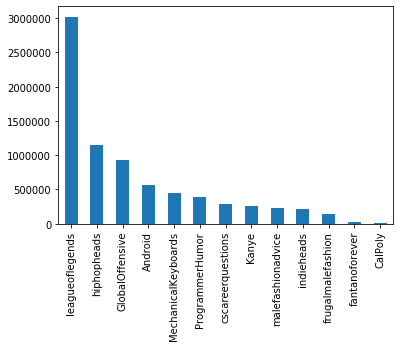

In [5]:
# Here is the data spread. /r/leagueoflegends is massive compared to the rest, with ~3 million comments of the 7.6 million
# coming from that subreddit alone

df['subreddit'].value_counts().plot.bar()

In [118]:
# saves just the comments for later use
comment_text = df['body']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vec = TfidfVectorizer(max_features=1000)
vec = CountVectorizer(max_features=500)

vec.fit(comment_text)
tf_idf = vec.transform(comment_text)

In [9]:
tf_idf

<7674870x500 sparse matrix of type '<class 'numpy.int64'>'
	with 105377799 stored elements in Compressed Sparse Row format>

### Note

I run out of memory if I try to transform this sparse array into a DataFrame. The resulting DataFrame would be 7.6M x 1000 in dimensions, and is mostly 0s anyways.

## Top 1000 Words

Below are the top 1000 words from the Inverse Document Frequency Term Frequencies (TF-IDF)

In [10]:
vec.get_feature_names()

['10',
 '100',
 '20',
 '50',
 'able',
 'about',
 'absolutely',
 'action',
 'actually',
 'adc',
 'after',
 'again',
 'against',
 'ago',
 'agree',
 'album',
 'all',
 'almost',
 'already',
 'also',
 'always',
 'am',
 'amazing',
 'amp',
 'an',
 'and',
 'android',
 'another',
 'any',
 'anyone',
 'anything',
 'app',
 'are',
 'aren',
 'around',
 'as',
 'ask',
 'at',
 'automatically',
 'away',
 'back',
 'bad',
 'based',
 'basically',
 'be',
 'beat',
 'because',
 'been',
 'before',
 'being',
 'believe',
 'best',
 'better',
 'between',
 'big',
 'bit',
 'black',
 'bot',
 'both',
 'build',
 'but',
 'buy',
 'by',
 'call',
 'came',
 'can',
 'care',
 'case',
 'cause',
 'champ',
 'champion',
 'champions',
 'champs',
 'change',
 'check',
 'close',
 'code',
 'com',
 'come',
 'comes',
 'comment',
 'comments',
 'company',
 'completely',
 'compose',
 'concerns',
 'contact',
 'content',
 'cool',
 'could',
 'cs',
 'damage',
 'damn',
 'day',
 'days',
 'definitely',
 'device',
 'did',
 'didn',
 'difference',
 

In [6]:
df_reduced = df.sample(n=500000)
comments = df_reduced[['body','subreddit']].dropna()

In [12]:
tf_idf = vec.fit_transform(comments.body)

In [13]:
tfidf = pd.DataFrame(tf_idf.todense(), columns=vec.get_feature_names())

In [14]:
df_all = comments.reset_index(drop=True).merge(tfidf, left_index=True, right_index=True)

In [16]:
df_all.drop('body', axis=1, inplace=True)

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
subreddit_groups = df_all.groupby('subreddit_x').mean()
cos_sims = pd.DataFrame(cosine_similarity(subreddit_groups), columns = subreddit_groups.index, index= subreddit_groups.index)

In [18]:
cos_sims

subreddit_x,Android,CalPoly,GlobalOffensive,Kanye,MechanicalKeyboards,ProgrammerHumor,cscareerquestions,fantanoforever,frugalmalefashion,hiphopheads,indieheads,leagueoflegends,malefashionadvice
subreddit_x,,,,,,,,,,,,,
Android,1.000000,0.956749,0.971984,0.947363,0.976102,0.975483,0.945022,0.938516,0.962985,0.947902,0.960002,0.957099,0.947352
CalPoly,0.956749,1.000000,0.974956,0.941486,0.961204,0.977007,0.988060,0.932212,0.957413,0.949549,0.952646,0.969426,0.949670
GlobalOffensive,0.971984,0.974956,1.000000,0.962200,0.970025,0.979790,0.965009,0.954018,0.964741,0.968996,0.963682,0.989006,0.952340
Kanye,0.947363,0.941486,0.962200,1.000000,0.950249,0.960018,0.925360,0.976841,0.934494,0.988026,0.973685,0.955230,0.914983
MechanicalKeyboards,0.976102,0.961204,0.970025,0.950249,1.000000,0.971211,0.948341,0.939174,0.973803,0.947725,0.962086,0.953574,0.953464
ProgrammerHumor,0.975483,0.977007,0.979790,0.960018,0.971211,1.000000,0.972865,0.947919,0.957565,0.961318,0.964271,0.969831,0.951281
cscareerquestions,0.945022,0.988060,0.965009,0.925360,0.948341,0.972865,1.000000,0.913073,0.944511,0.932260,0.933091,0.958657,0.942489
fantanoforever,0.938516,0.932212,0.954018,0.976841,0.939174,0.947919,0.913073,1.000000,0.922012,0.984406,0.968426,0.950239,0.903110
frugalmalefashion,0.962985,0.957413,0.964741,0.934494,0.973803,0.957565,0.944511,0.922012,1.000000,0.939420,0.956183,0.948336,0.970942


In [19]:
cos_sims.idxmin()

subreddit_x
Android                   fantanoforever
CalPoly                   fantanoforever
GlobalOffensive        malefashionadvice
Kanye                  malefashionadvice
MechanicalKeyboards       fantanoforever
ProgrammerHumor           fantanoforever
cscareerquestions         fantanoforever
fantanoforever         malefashionadvice
frugalmalefashion         fantanoforever
hiphopheads            malefashionadvice
indieheads             cscareerquestions
leagueoflegends        malefashionadvice
malefashionadvice         fantanoforever
dtype: object

In [21]:
df_android = df[df['subreddit'] == 'Android']

In [26]:
df.groupby('subreddit')['body'].apply(vec.fit_transform)

subreddit
Android                  (0, 202)\t1\n  (0, 408)\t3\n  (0, 121)\t1\n ...
CalPoly                  (0, 417)\t1\n  (0, 156)\t1\n  (0, 418)\t1\n ...
GlobalOffensive          (0, 471)\t1\n  (0, 459)\t1\n  (0, 13)\t1\n  ...
Kanye                    (0, 62)\t1\n  (0, 399)\t1\n  (0, 453)\t1\n  ...
MechanicalKeyboards      (0, 287)\t1\n  (0, 424)\t1\n  (0, 418)\t1\n ...
ProgrammerHumor          (0, 412)\t1\n  (0, 198)\t1\n  (1, 198)\t1\n ...
cscareerquestions        (0, 106)\t1\n  (0, 498)\t1\n  (0, 89)\t1\n  ...
fantanoforever           (0, 361)\t1\n  (0, 454)\t2\n  (0, 164)\t1\n ...
frugalmalefashion        (0, 16)\t1\n  (0, 342)\t2\n  (0, 278)\t1\n  ...
hiphopheads              (0, 158)\t1\n  (0, 401)\t2\n  (0, 399)\t2\n ...
indieheads               (0, 491)\t1\n  (0, 357)\t1\n  (0, 62)\t1\n  ...
leagueoflegends          (0, 498)\t1\n  (0, 183)\t1\n  (0, 413)\t1\n ...
malefashionadvice        (0, 407)\t1\n  (0, 182)\t1\n  (0, 171)\t1\n ...
Name: body, dtype: object

In [45]:
subreddit_words = df.groupby('subreddit')['body'].apply(lambda x : x.str.cat(sep=' '))
subreddit_words

subreddit
Android                If they do so, then where are they going to pr...
CalPoly                Thanks for sharing that! I'll call Navient but...
GlobalOffensive        Which was, again, propped up by their early 20...
Kanye                  By the way.... not cleared 😂 this level of whi...
MechanicalKeyboards    No, they sent the opaque tops, all black. What...
ProgrammerHumor        There is.  Hey, HTML is not a programming lang...
cscareerquestions      Does your current company not have recruiters?...
fantanoforever         See I was going to give it a chance, but then ...
frugalmalefashion      I'm talking about a sitewide sale, not just th...
hiphopheads            I get the impression that he writes his own ba...
indieheads             Yeah she came out last year. And listen to the...
leagueoflegends        You have the map awareness of a raccoon in a g...
malefashionadvice      Thanks have a great new year you too!  I know ...
Name: body, dtype: object

## Do tfidf on each group

In [8]:
subreddit_groups = comments.groupby('subreddit')['body']

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vec = TfidfVectorizer(max_features=500, ngram_range=(1,2))
tfidfs = subreddit_groups.apply(lambda x : pd.DataFrame(vec.fit_transform(x).todense(), columns=vec.get_feature_names()))

In [68]:
tfidfs = tfidfs.fillna(0)
tfidfs['subreddit'] = tfidfs.index.get_level_values(0)
tfidfs.index = tfidfs.index.droplevel()
tfidfs

,about,all,also,an,and,android,any,app,apps,are,...,malefashionadvice,moderators,our,outfit,pants,question,questions,shirt,simple,subreddit
0,0.0,0.0,0.0,0.000000,0.172069,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android
2,0.0,0.0,0.0,0.421987,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15083,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malefashionadvice
15084,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malefashionadvice
15085,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malefashionadvice
15086,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malefashionadvice


In [70]:
tfidf_means = tfidfs.groupby('subreddit').mean()

In [76]:
tfidf_means

,about,all,also,an,and,android,any,app,apps,are,...,looking,malefashionadvice,moderators,our,outfit,pants,question,questions,shirt,simple
subreddit,,,,,,,,,,,,,,,,,,,,,
Android,0.022850,0.022714,0.014454,0.024310,0.078240,0.024958,0.013961,0.015864,0.012305,0.033887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
CalPoly,0.020638,0.022925,0.017899,0.021508,0.082035,0.000000,0.011048,0.000000,0.000000,0.039408,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
GlobalOffensive,0.016948,0.017580,0.010629,0.015240,0.066216,0.000000,0.010489,0.000000,0.000000,0.028603,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Kanye,0.014036,0.019297,0.007222,0.010532,0.046599,0.000000,0.000000,0.000000,0.000000,0.017675,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
MechanicalKeyboards,0.016336,0.016518,0.013377,0.015886,0.065428,0.000000,0.015622,0.000000,0.000000,0.038593,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
ProgrammerHumor,0.016356,0.018090,0.010441,0.019221,0.060811,0.000000,0.010006,0.000000,0.000000,0.027350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
cscareerquestions,0.029158,0.023561,0.018080,0.033484,0.098232,0.000000,0.022231,0.000000,0.000000,0.046263,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
fantanoforever,0.018021,0.019231,0.009189,0.016085,0.056663,0.000000,0.000000,0.000000,0.000000,0.019389,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
frugalmalefashion,0.016208,0.019420,0.011516,0.015270,0.068922,0.000000,0.016444,0.000000,0.000000,0.040650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [77]:
cos_sims = pd.DataFrame(cosine_similarity(tfidf_means), columns = tfidf_means.index, index= tfidf_means.index)

In [80]:
cos_sims

subreddit,Android,CalPoly,GlobalOffensive,Kanye,MechanicalKeyboards,ProgrammerHumor,cscareerquestions,fantanoforever,frugalmalefashion,hiphopheads,indieheads,leagueoflegends,malefashionadvice
subreddit,,,,,,,,,,,,,
Android,1.000000,0.932404,0.947190,0.901643,0.924715,0.951563,0.923850,0.889116,0.920427,0.913121,0.923551,0.932659,0.909552
CalPoly,0.932404,1.000000,0.947531,0.913325,0.924322,0.951143,0.955928,0.899636,0.928525,0.925222,0.936222,0.940188,0.920944
GlobalOffensive,0.947190,0.947531,1.000000,0.938463,0.922235,0.963213,0.941635,0.932561,0.926796,0.951848,0.941072,0.983097,0.914905
Kanye,0.901643,0.913325,0.938463,1.000000,0.891549,0.932305,0.893397,0.944776,0.884228,0.971163,0.942020,0.931051,0.874052
MechanicalKeyboards,0.924715,0.924322,0.922235,0.891549,1.000000,0.931601,0.908989,0.872398,0.930051,0.893329,0.911886,0.904709,0.920882
ProgrammerHumor,0.951563,0.951143,0.963213,0.932305,0.931601,1.000000,0.951393,0.916677,0.921907,0.936938,0.936352,0.945726,0.918822
cscareerquestions,0.923850,0.955928,0.941635,0.893397,0.908989,0.951393,1.000000,0.882492,0.910801,0.907580,0.913453,0.934644,0.904751
fantanoforever,0.889116,0.899636,0.932561,0.944776,0.872398,0.916677,0.882492,1.000000,0.867640,0.961460,0.941012,0.924632,0.861520
frugalmalefashion,0.920427,0.928525,0.926796,0.884228,0.930051,0.921907,0.910801,0.867640,1.000000,0.895893,0.917834,0.910533,0.935664


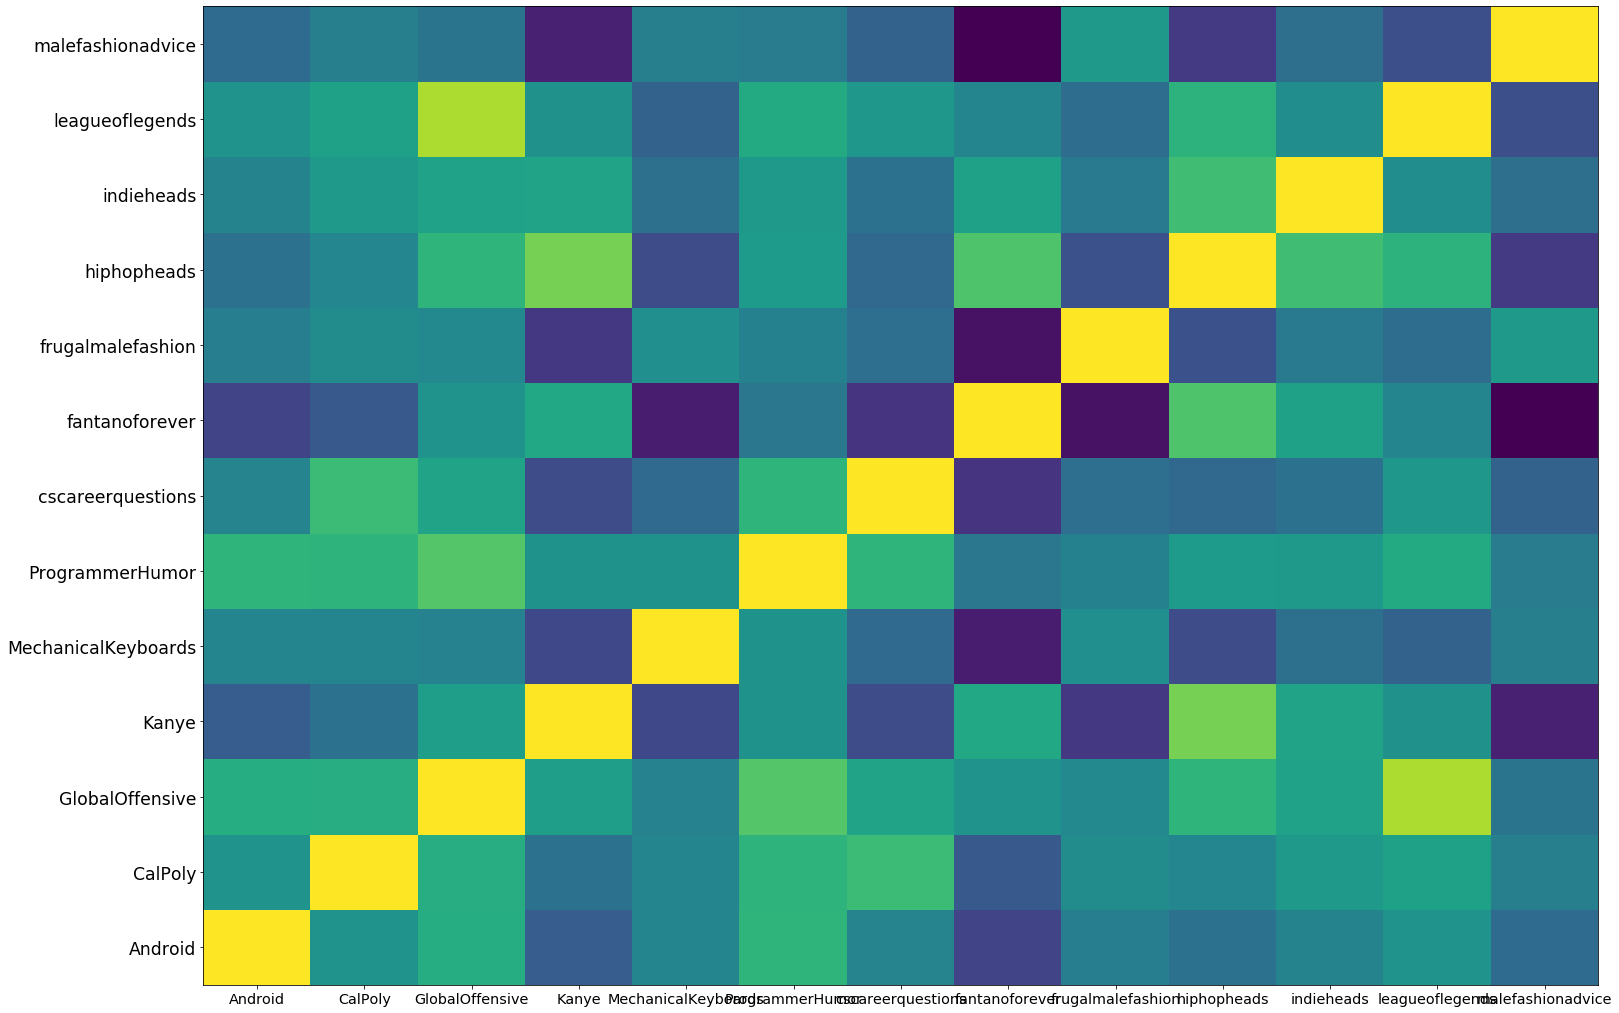

In [81]:
import matplotlib.pyplot as plt

plt.pcolor(cos_sims, figure=plt.figure(figsize=(25,18)))
plt.yticks(np.arange(0.5, len(cos_sims.index), 1), cos_sims.index, fontsize='xx-large')
plt.xticks(np.arange(0.5, len(cos_sims.columns), 1), cos_sims.columns, fontsize='x-large')
plt.show()

## Cosine Similarity Heatmap of .groupby() on subreddit

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=500)
tfidf = vec.fit_transform(subreddit_words)

In [49]:
tfidf

<13x500 sparse matrix of type '<class 'numpy.float64'>'
	with 6436 stored elements in Compressed Sparse Row format>

In [75]:
tfidf_means.index

Index(['Android', 'CalPoly', 'GlobalOffensive', 'Kanye', 'MechanicalKeyboards',
       'ProgrammerHumor', 'cscareerquestions', 'fantanoforever',
       'frugalmalefashion', 'hiphopheads', 'indieheads', 'leagueoflegends',
       'malefashionadvice'],
      dtype='object', name='subreddit')

In [73]:
cos_sims = pd.DataFrame(cosine_similarity(subreddit_groups), columns = subreddit_groups.index, index= subreddit_groups.index)

NameError: name 'subreddit_words' is not defined

In [61]:
cos_sims

subreddit,Android,CalPoly,GlobalOffensive,Kanye,MechanicalKeyboards,ProgrammerHumor,cscareerquestions,fantanoforever,frugalmalefashion,hiphopheads,indieheads,leagueoflegends,malefashionadvice
subreddit,,,,,,,,,,,,,
Android,1.000000,0.965879,0.971514,0.946715,0.976054,0.975230,0.946028,0.942354,0.963638,0.948241,0.960471,0.956194,0.946611
CalPoly,0.965879,1.000000,0.981245,0.950065,0.972088,0.981594,0.987379,0.943492,0.965995,0.956819,0.963855,0.973098,0.952528
GlobalOffensive,0.971514,0.981245,1.000000,0.962028,0.969429,0.979557,0.966834,0.957981,0.964276,0.968908,0.963780,0.988730,0.952519
Kanye,0.946715,0.950065,0.962028,1.000000,0.949862,0.960337,0.928026,0.984755,0.934772,0.988800,0.972961,0.955378,0.914636
MechanicalKeyboards,0.976054,0.972088,0.969429,0.949862,1.000000,0.971412,0.949803,0.943566,0.974762,0.948246,0.963097,0.952429,0.953097
ProgrammerHumor,0.975230,0.981594,0.979557,0.960337,0.971412,1.000000,0.974044,0.952436,0.957635,0.961374,0.964068,0.968992,0.949714
cscareerquestions,0.946028,0.987379,0.966834,0.928026,0.949803,0.974044,1.000000,0.916631,0.946153,0.935142,0.937954,0.959804,0.943085
fantanoforever,0.942354,0.943492,0.957981,0.984755,0.943566,0.952436,0.916631,1.000000,0.927102,0.993293,0.979166,0.954250,0.906274
frugalmalefashion,0.963638,0.965995,0.964276,0.934772,0.974762,0.957635,0.946153,0.927102,1.000000,0.940084,0.958297,0.947710,0.969577


In [62]:
cos_sims.idxmin()

subreddit
Android                   fantanoforever
CalPoly                   fantanoforever
GlobalOffensive        malefashionadvice
Kanye                  malefashionadvice
MechanicalKeyboards       fantanoforever
ProgrammerHumor        malefashionadvice
cscareerquestions         fantanoforever
fantanoforever         malefashionadvice
frugalmalefashion         fantanoforever
hiphopheads            malefashionadvice
indieheads             malefashionadvice
leagueoflegends        malefashionadvice
malefashionadvice         fantanoforever
dtype: object

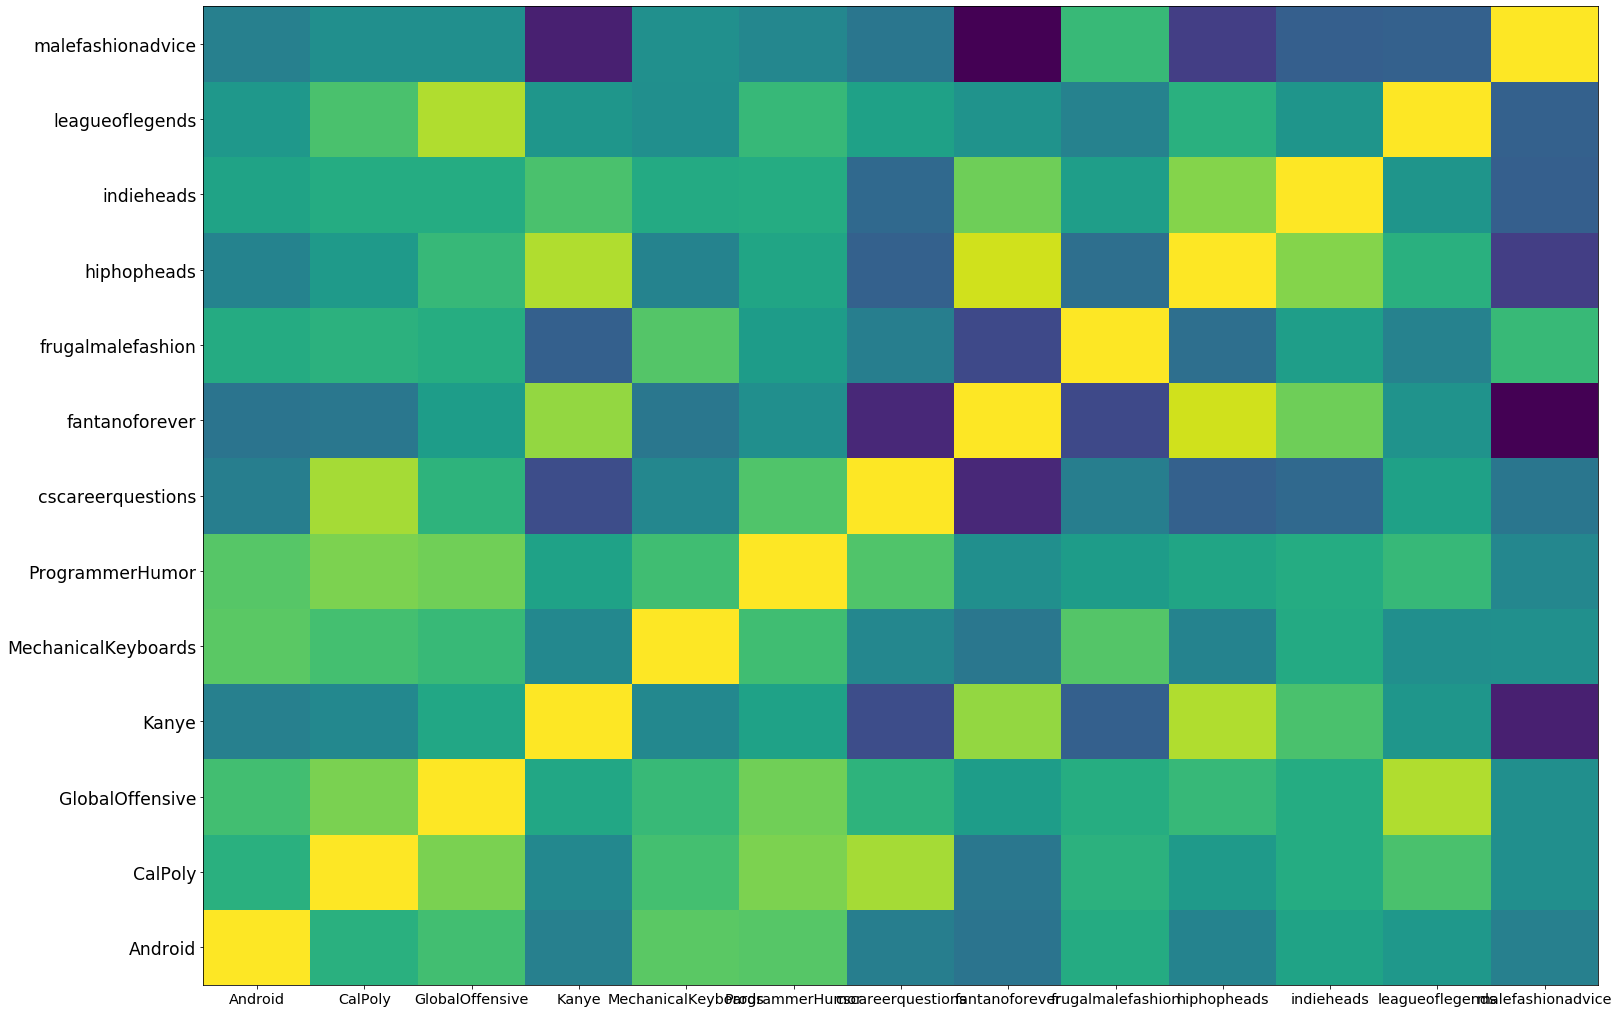

In [110]:
import matplotlib.pyplot as plt

plt.pcolor(cos_sims, figure=plt.figure(figsize=(25,18)))
plt.yticks(np.arange(0.5, len(cos_sims.index), 1), cos_sims.index, fontsize='xx-large')
plt.xticks(np.arange(0.5, len(cos_sims.columns), 1), cos_sims.columns, fontsize='x-large')
plt.show()

In [63]:
vec.get_feature_names()

['10',
 '100',
 '20',
 '50',
 'able',
 'about',
 'absolutely',
 'action',
 'actually',
 'adc',
 'after',
 'again',
 'against',
 'ago',
 'agree',
 'album',
 'all',
 'almost',
 'already',
 'also',
 'always',
 'am',
 'amazing',
 'amp',
 'an',
 'and',
 'android',
 'another',
 'any',
 'anyone',
 'anything',
 'app',
 'are',
 'aren',
 'around',
 'as',
 'ask',
 'at',
 'automatically',
 'away',
 'back',
 'bad',
 'based',
 'basically',
 'be',
 'beat',
 'because',
 'been',
 'before',
 'being',
 'believe',
 'best',
 'better',
 'between',
 'big',
 'bit',
 'black',
 'bot',
 'both',
 'build',
 'but',
 'buy',
 'by',
 'call',
 'came',
 'can',
 'care',
 'case',
 'cause',
 'champ',
 'champion',
 'champions',
 'champs',
 'change',
 'check',
 'close',
 'code',
 'com',
 'come',
 'comes',
 'comment',
 'comments',
 'company',
 'completely',
 'compose',
 'concerns',
 'contact',
 'content',
 'cool',
 'could',
 'cs',
 'damage',
 'damn',
 'day',
 'days',
 'definitely',
 'device',
 'did',
 'didn',
 'difference',
 

# Graphing and Clustering

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(2)
pca.fit(subreddit_groups)

NameError: name 'subreddit_groups' is not defined

In [73]:
pd.DataFrame(pca.transform(subreddit_groups), columns=['PC1', 'PC2']).plot.scatter('')

,PC1,PC2
0,32.111122,-21.544446
1,-1473.160579,-141.706039
2,694.594875,-19.250658
3,-1023.817281,39.012459
4,-388.319006,-47.999125
5,-625.873131,-58.800004
6,-550.405638,-127.153643
7,-1444.068351,-119.332511
8,-1169.769926,-117.293337
9,1173.468892,944.788128


In [77]:
scaler = StandardScaler()

scaled_subreddits = scaler.fit_transform(subreddit_groups)

In [80]:
df_scaled = pd.DataFrame(scaled_subreddits, index = subreddit_groups.index, columns = subreddit_groups.columns)

In [87]:
x = pd.DataFrame(pca.transform(df_scaled), columns=['PC1', 'PC2'], index = df_scaled.index) * -1

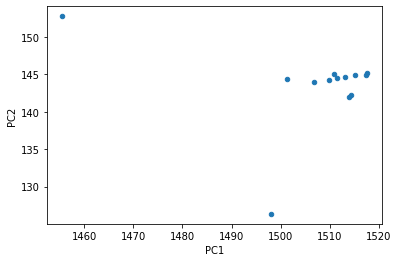

In [88]:
x.plot.scatter(x='PC1', y='PC2')

In [89]:
x

,PC1,PC2
subreddit_x,,
Android,1506.835571,144.022255
CalPoly,1517.521947,145.169261
GlobalOffensive,1501.301067,144.311728
Kanye,1514.281332,142.235824
MechanicalKeyboards,1509.738856,144.237343
ProgrammerHumor,1511.521041,144.490801
cscareerquestions,1510.785068,145.062083
fantanoforever,1517.300959,144.859389
frugalmalefashion,1515.225202,144.884204


In [20]:
df_all = df_all.set_index('subreddit_x')

In [51]:
df_all

,subreddit_x,10,100,12,15,16,20,2018,2019,25,...,yeah,year,years,yes,yet,you,young,your,yourself,youtube
0,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.248157,0.0,0.0,0.0,0.000000,0.130366,0.0,0.0,0.0,0.0
1,MechanicalKeyboards,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,frugalmalefashion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.573817,0.239300,0.0,0.0,0.0,0.0
3,Kanye,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,hiphopheads,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,Android,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
99993,hiphopheads,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
99994,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.124079,0.0,0.0,0.0,0.0
99995,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [53]:
X_train = df_all.drop('subreddit_x', axis=1)
X_train

,10,100,12,15,16,20,2018,2019,25,2fr,...,yeah,year,years,yes,yet,you,young,your,yourself,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.248157,0.0,0.0,0.0,0.000000,0.130366,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.573817,0.239300,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
99993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
99994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.124079,0.0,0.0,0.0,0.0
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [54]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X_train)
x = pca.transform(X_train)

In [57]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=13, n_jobs=-1)
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

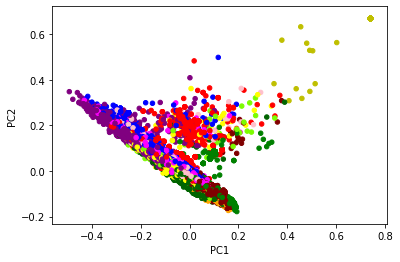

In [67]:
x = pd.DataFrame(pca.transform(X_train), columns=['PC1', 'PC2'], index = X_train.index)
clusters = model.labels_

In [88]:
colors = pd.Series(df_all['subreddit_x']).map({
    'leagueoflegends': "red",
    'hiphopheads': "blue",
    'GlobalOffensive': "yellow",
    'Android': "green",
    'MechanicalKeyboards': "pink",
    'ProgrammerHumor': "maroon",
    'cscareerquestions': "magenta",
    'Kanye': "purple",
    'malefashionadvice': "orange",
    'indieheads': "darkgreen",
    'frugalmalefashion': "lawngreen",
    'fantanoforever': "black",
    'CalPoly': "darkorange"
})

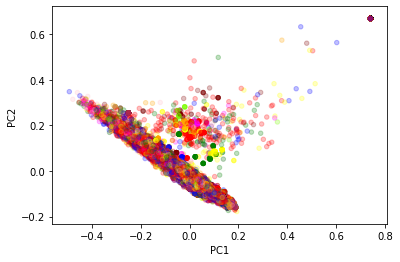

In [89]:
x.plot.scatter(x='PC1', y='PC2', c=colors, alpha=.25)

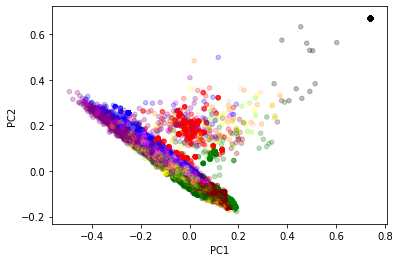

In [85]:
colors = pd.Series(clusters).map({
    0: "red",
    1: "blue",
    2: "yellow",
    3: "green",
    4: "pink",
    5: "maroon",
    6: "magenta",
    7: "purple",
    8: "orange",
    9: "darkgreen",
    10: "lawngreen",
    11: "black",
    12: "darkorange",
})

x.plot.scatter(x='PC1', y='PC2', c=colors, alpha=.25)

In [72]:
df_all['label'] = clusters
df_all[df_all['label'] == 11]

,subreddit_x,10,100,12,15,16,20,2018,2019,25,...,year,years,yes,yet,you,young,your,yourself,youtube,label
12,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
15,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
24,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
174,hiphopheads,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
203,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99873,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
99915,hiphopheads,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
99916,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
99926,leagueoflegends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df_all)
df_scaled = pd.DataFrame(scaled, columns=vec.get_feature_names())
df_scaled

,10,100,12,15,16,20,2018,2019,25,2fr,...,yeah,year,years,yes,yet,you,young,your,yourself,youtube
0,-0.099912,-0.080099,-0.046377,-0.058809,-0.044174,-0.07112,-0.046025,-0.047639,-0.045366,-0.06069,...,4.538406,-0.12,-0.120777,-0.101739,-0.079417,0.917496,-0.044589,-0.245635,-0.063543,-0.07725
1,-0.099912,-0.080099,-0.046377,-0.058809,-0.044174,-0.07112,-0.046025,-0.047639,-0.045366,-0.06069,...,-0.145193,-0.12,-0.120777,-0.101739,-0.079417,-0.474847,-0.044589,-0.245635,-0.063543,-0.07725
2,-0.099912,-0.080099,-0.046377,-0.058809,-0.044174,-0.07112,-0.046025,-0.047639,-0.045366,-0.06069,...,-0.145193,-0.12,-0.120777,-0.101739,21.613450,2.080945,-0.044589,-0.245635,-0.063543,-0.07725
3,-0.099912,-0.080099,-0.046377,-0.058809,-0.044174,-0.07112,-0.046025,-0.047639,-0.045366,-0.06069,...,-0.145193,-0.12,-0.120777,-0.101739,-0.079417,-0.474847,-0.044589,-0.245635,-0.063543,-0.07725
4,-0.099912,-0.080099,-0.046377,-0.058809,-0.044174,-0.07112,-0.046025,-0.047639,-0.045366,-0.06069,...,-0.145193,-0.12,-0.120777,-0.101739,-0.079417,-0.474847,-0.044589,-0.245635,-0.063543,-0.07725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,-0.099912,-0.080099,-0.046377,-0.058809,-0.044174,-0.07112,-0.046025,-0.047639,-0.045366,-0.06069,...,-0.145193,-0.12,-0.120777,-0.101739,-0.079417,-0.474847,-0.044589,-0.245635,-0.063543,-0.07725
99993,-0.099912,-0.080099,-0.046377,-0.058809,-0.044174,-0.07112,-0.046025,-0.047639,-0.045366,-0.06069,...,-0.145193,-0.12,-0.120777,-0.101739,-0.079417,-0.474847,-0.044589,-0.245635,-0.063543,-0.07725
99994,-0.099912,-0.080099,-0.046377,-0.058809,-0.044174,-0.07112,-0.046025,-0.047639,-0.045366,-0.06069,...,-0.145193,-0.12,-0.120777,-0.101739,-0.079417,0.850348,-0.044589,-0.245635,-0.063543,-0.07725
99995,-0.099912,-0.080099,-0.046377,-0.058809,-0.044174,-0.07112,-0.046025,-0.047639,-0.045366,-0.06069,...,-0.145193,-0.12,-0.120777,-0.101739,-0.079417,-0.474847,-0.044589,-0.245635,-0.063543,-0.07725


In [42]:
x = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'], index = df_scaled.index)

In [43]:
x

,PC1,PC2
0,-0.349300,-1.572314
1,0.587701,-0.115747
2,-0.637001,-0.760642
3,0.448338,-0.885844
4,-0.676247,0.396111
...,...,...
99992,-0.705259,2.937094
99993,-0.606264,-0.500852
99994,-0.362715,3.020399
99995,-0.075906,0.351172


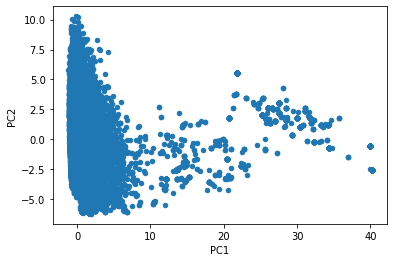

In [44]:
x.plot.scatter(x='PC1', y='PC2')

In [119]:
lol_mech = df[(df['subreddit'] == 'malefashionadvice') |  (df['subreddit'] == 'fantanoforever')]
lol_mech_sample = lol_mech.sample(n=250000)[['subreddit', 'body']]
lol_mech_sample

,subreddit,body
7655784,malefashionadvice,Tar-tis
6083076,malefashionadvice,Yes. Also I made a typo- sleeves on the uniqlo...
4867358,malefashionadvice,Thanks! I tend to have trouble with Banana's f...
7404796,malefashionadvice,That's still pretty much true
1272289,malefashionadvice,Surely a v neck t shirt is still a t shirt?
...,...,...
3955811,malefashionadvice,its great. you will be a star.
7181985,fantanoforever,So I would say that he proliferation of hate s...
6916394,malefashionadvice,"Very helpful, thanks!"
2950417,malefashionadvice,Why does it irritate you?\n\nThis guy found a ...


In [120]:
# Use vec from above
from sklearn.feature_extraction.text import CountVectorizer
vec = TfidfVectorizer(max_features=300)
#vec2 = CountVectorizer(max_features=300)
lol_mech_tf = vec.fit_transform(lol_mech_sample['body'].dropna())

In [121]:
df_lol_mech_tf = pd.DataFrame(lol_mech_tf.todense(), columns=vec.get_feature_names(), index=lol_mech_sample.index)

In [122]:
df_lol_mech_tf

,10,10pm,12pm,about,action,actually,advice,after,album,all,...,with,work,would,www,x200b,yeah,year,years,you,your
7655784,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
6083076,0.0,0.0,0.0,0.245496,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4867358,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133523,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.235088,0.000000,0.0
7404796,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1272289,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955811,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.255035,0.0
7181985,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.09144,0.075362,0.0,0.0,0.103031,0.0,0.000000,0.000000,0.0
6916394,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2950417,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.234488,0.104269,0.0


In [123]:
comments = df[['body','subreddit']].dropna()
df_lol_mech = comments.merge(df_lol_mech_tf, left_index=True, right_index=True)
df_lol_mech

,body,subreddit_x,10,10pm,12pm,about,action,actually,advice,after,...,with,work,would,www,x200b,yeah,year,years,you,your
24,Thanks have a great new year you too!,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.4934,0.000000,0.210092,0.000000
25,I know that this looks more like daytime styli...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.346091,0.153895,0.000000
32,0-30-100-200-300-500+,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
57,_Never_ take a selfie with your hand in your p...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164506,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.128792,0.534739
94,My mother has one [like this](https://www.craf...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.197316,0.0,0.0,0.0000,0.000000,0.000000,0.170942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674920,"IMO yes, would work better with more athleisur...",malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.296234,0.45039,0.371199,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
7674930,Anyone got any tips for packing a suit in a ba...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
7674945,"I might fall into the middle, as I really like...",malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.123286,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.048261,0.066792
7674956,Kinda like some of these.\nStupid question: is...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000


In [124]:
X_train = df_lol_mech.drop(['body', 'subreddit_x'], axis=1)
X_train

,10,10pm,12pm,about,action,actually,advice,after,album,all,...,with,work,would,www,x200b,yeah,year,years,you,your
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.4934,0.000000,0.210092,0.000000
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.346091,0.153895,0.000000
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164506,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.128792,0.534739
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.197316,0.0,0.0,0.0000,0.000000,0.000000,0.170942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.296234,0.45039,0.371199,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
7674930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
7674945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.123286,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.048261,0.066792
7674956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000


In [125]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [126]:
pca = PCA(2)
df_pca = pd.DataFrame(pca.fit_transform(X_train_scaled), columns=['PC1', 'PC2'], index=df_lol_mech.index)

In [127]:
df_pca

,PC1,PC2
24,-1.595084,-0.364767
25,-1.122155,-0.993065
32,-1.464138,-0.368529
57,-1.374998,1.457763
94,-0.014765,-1.280959
...,...,...
7674920,-1.642009,-0.507554
7674930,-1.369065,-0.051623
7674945,-1.223163,0.435289
7674956,-0.590502,1.946089


In [128]:
df_pca['subreddit'] = df_lol_mech['subreddit_x']
df_pca

,PC1,PC2,subreddit
24,-1.595084,-0.364767,malefashionadvice
25,-1.122155,-0.993065,malefashionadvice
32,-1.464138,-0.368529,malefashionadvice
57,-1.374998,1.457763,malefashionadvice
94,-0.014765,-1.280959,malefashionadvice
...,...,...,...
7674920,-1.642009,-0.507554,malefashionadvice
7674930,-1.369065,-0.051623,malefashionadvice
7674945,-1.223163,0.435289,malefashionadvice
7674956,-0.590502,1.946089,malefashionadvice


In [129]:
colors = pd.Series(df_pca['subreddit']).map({
    'malefashionadvice': "red",
    'fantanoforever': "blue"
})

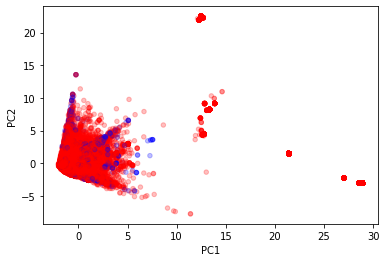

In [130]:
df_pca.plot.scatter(x='PC1', y='PC2', c=colors, alpha=.25)